# Improving performance

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Load the data
df = pd.read_csv('../data/new_titanic_features.csv')

In [7]:
# Create Features and Labels
X = df[['Male', 'Family',
        'Pclass2_one', 'Pclass2_two', 'Pclass2_three',
        'Embarked_C', 'Embarked_Q', 'Embarked_S',
        'Age2', 'Fare3_Fare11to50', 'Fare3_Fare51+', 'Fare3_Fare<=10']]
y = df['Survived']


In [8]:
X.describe()

,Male,Family,Pclass2_one,Pclass2_two,Pclass2_three,Embarked_C,Embarked_Q,Embarked_S,Age2,Fare3_Fare11to50,Fare3_Fare51+,Fare3_Fare<=10
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.649044,0.398200,0.240720,0.206974,0.552306,0.188976,0.086614,0.724409,29.759280,0.413948,0.176603,0.409449
std,0.477538,0.489803,0.427761,0.405365,0.497536,0.391710,0.281427,0.447063,14.279012,0.492817,0.381547,0.492009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,29.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,38.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
print('Train Accuracy: {:0.3}'.format(accuracy_score(y_train, pred_train)))
print('Test Accuracy: {:0.3}'.format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.821
Test Accuracy: 0.719


In [15]:
confusion_matrix(y_test, pred_test)

array([[86, 19],
       [31, 42]])

In [16]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.74      0.82      0.77       105
           1       0.69      0.58      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.71       178



## Feature importances (wrong! see exercise 1)

In [17]:
coeffs = pd.Series(model.coef_.ravel(), index=X.columns)
coeffs

Male               -2.594783
Family             -0.056240
Pclass2_one         1.309481
Pclass2_two         0.614350
Pclass2_three      -0.606129
Embarked_C          0.536608
Embarked_Q          0.885574
Embarked_S         -0.104481
Age2               -0.030736
Fare3_Fare11to50    0.342374
Fare3_Fare51+       0.719065
Fare3_Fare<=10      0.256262
dtype: float64

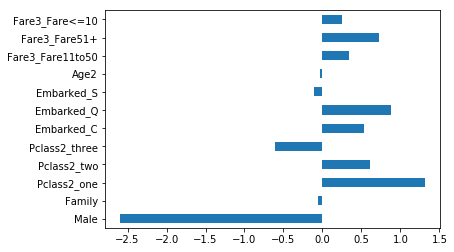

In [18]:
coeffs.plot(kind='barh')

## Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [20]:
cv = ShuffleSplit(n_splits=5, test_size=.4, random_state=0)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.76123596, 0.78370787, 0.78651685, 0.78932584, 0.82303371])

In [21]:
'Crossval score: %0.3f +/- %0.3f ' % (scores.mean(), scores.std())

'Crossval score: 0.789 +/- 0.020 '

## Learning curve

In [22]:
from sklearn.model_selection import learning_curve

In [23]:
tsz = np.linspace(0.1, 1, 10)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=tsz, cv=3)

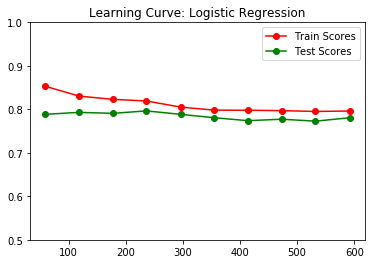

In [24]:
fig = plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'ro-', label="Train Scores")
plt.plot(train_sizes, test_scores.mean(axis=1), 'go-', label="Test Scores")
plt.title('Learning Curve: Logistic Regression')
plt.ylim((0.5, 1.0))
plt.legend()
plt.draw()
plt.show()

### Exercise 1

Try rescaling the Age feature with [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/preprocessing.html) so that it will have comparable size to the other features.

- Do the model prediction change?
- Does the performance of the model change?
- Do the feature importances change?
- How can you explain what you've observed?

### Exercise 2

Experiment with another classifier for example `DecisionTreeClassifier`, `RandomForestClassifier`,  `SVC`, `MLPClassifier`, `SGDClassifier` or any other classifier of choice you can find here: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html. 

- Train the model on both the scaled data and on the unscaled data
- Compare the score for the scaled and unscaled data
- how can you get the features importances for tree based models? Check [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) for some help.
- Which classifiers are impacted by the age rescale? Why?

### Exercise 3

Pick your preferred classifier from Exercise 2 and search for the best hyperparameters. You can read about hyperparameter search [here](http://scikit-learn.org/stable/modules/grid_search.html)

- Decide the range of hyperparameters you intend to explore
- Try using [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) to perform brute force search
- Try using [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for a random search
- Once you've chosen the best classifier and the best hyperparameter set, redo the learning curve.
Do you need more data or a better model?